# Importing Data in R
## -- DataCamp - Data Scientist with R Career Track - Course 11 --

 **Note**
 
This Notebook covers the "Introduction to Importing Data in R" and "Intermediate Importing Data" in R courses
  
To use this code, select the R environment in Anaconda

 
 **Used packages**
- readr
- data.table
- readxl
- rio
- janitor
- RMySQL
- jsonlite
- haven
- foreign
 
**Table of content**
- [&nbsp;&nbsp;1. Importing with different packages](#toc_447142_1)
    - [&nbsp;&nbsp;1.1. The utils package](#toc_447142_1.1)
    - [&nbsp;&nbsp;1.2. The readr package](#toc_447142_1.2)
    - [&nbsp;&nbsp;1.3. The data.table package](#toc_447142_1.3)
    - [&nbsp;&nbsp;1.4. The readxl package](#toc_447142_1.4)
    - [&nbsp;&nbsp;1.5. The rio package](#toc_447142_1.5)
    - [&nbsp;&nbsp;1.6. The readRDS function](#toc_447142_1.6)
    - [&nbsp;&nbsp;1.7. Load RData](#toc_447142_1.7)
- [&nbsp;&nbsp;2. The janitor package](#toc_447142_2)   
- [&nbsp;&nbsp;3. Reproducible Excel work with XLConnect](#toc_447142_3)        
- [&nbsp;&nbsp;4. Importing data from databases](#toc_447142_4)   
    - [&nbsp;&nbsp;4.1 Connecting to a database](#toc_447142_4.1)  
    - [&nbsp;&nbsp;4.2 Import table from a database](#toc_447142_4.2)  
    - [&nbsp;&nbsp;4.3 Using SQL Queries from inside R](#toc_447142_4.3)  
    - [&nbsp;&nbsp;4.4 Disconnect from a database](#toc_447142_4.4)  
- [&nbsp;&nbsp;5. Importing data from the web](#toc_447142_5)   
    - [&nbsp;&nbsp;5.1 Read and download files from the web](#toc_447142_5.1)  
    - [&nbsp;&nbsp;5.2 APIs & JSON](#toc_447142_5.2)  
- [&nbsp;&nbsp;6. Importing data from statistical softwares](#toc_447142_6)     
    

**Set environment and plot size**

In [174]:
options(repr.plot.width=6, repr.plot.height=6)
suppressMessages(library(readr))
suppressMessages(library(data.table))
suppressMessages(library(readxl))
suppressMessages(library(rio))
suppressMessages(library(janitor))
suppressMessages(library(DBI)) # installed with the RMySQL package, library(RMySQL) is not needed
suppressMessages(library(jsonlite)) 
suppressMessages(library(haven)) 
suppressMessages(library(foreign)) 

Note: if the above code return an error message:
- Check that the correct R environment is selected in Anaconda
- Restart computer

<a name="toc_447142_1"></a>
## 1.   Importing with different packages

<u>utils package</u>

The built-in `utils` R package takes care of import processes. Its main function is:
- `read.table()` - it has many arguments and can import many file types and can handle different separators with the `sep = ` argument (e.g. `"/"`, `"\t"` (tab) etc.)

There are more specific **wrapper functions** that actually call `read.table()`  behind the scenes, but with different default arguments to match the specific formats:
- `read.csv()` - `sep = ","`
- `read.delim()` - `sep = "\t"`
- `read.csv2()` - `sep = ";"`, `dec = ","` - used in regions where decimals are indicated with "," instead of "."
- `read.delim2()` - `dec = ","` - used in regions where decimals are indicated with "," instead of "."

<u>readr package</u>

Work the same way as the utils functions but return a **tibble** instead of a data frame.
- `read_csv()`
- `read_tsv()` - for Tab Separated Values
- `read_delim()` - similar to read.table() but has the `delim=` argument instead of `sep=`

<u>data.table package</u>

Very fast and convenient, so great for large files. Return a data.table.
- `fread()` - automatically handles column names and separators

<u>readxl package</u>

For xls and xlsx files and return a tibble.
- `excel_sheets()` - lists different sheets
- `read_excel()` - actually import data into R

An alternative to readxl is the `read.xls()` function from the `gdata package`. Some prefer this package despite its many disadvantages. `read.xls()` can only handle the .xls format, and you need to install a driver to support the newer xlsx format as well. Furthermore, it uses Perl code to convert the data in the excel sheet to a .csv file that is then read by `read.csv()`. It is slow and extremely inefficient for large files. Its only advantage over readxl is that readxl is still under development while gdata is more established.

<u>rio package</u>

The idea behind `rio` is to simplify the process of importing data into R and exporting data from R. it uses the file extension of a file name to determine what kind of file it is. By taking away the need to manually match a file type to a particular import or export function, rio allows almost all common data formats to be read with the same function. It basically **central wrapper** that offer wrapper function for the ones mentioned earlier (and many more).

- `import()`
- `export()`

<a name="toc_447142_1.1"></a>
**1.1 The utils package**

In [37]:
# Read "/" delimited TXT
hot2 <- read.table("data/import_data/hotdogs_slash.txt", 
                   header = FALSE,
                   sep = "/",
                   stringsAsFactors = TRUE,
                   col.names = c("type", "calories", "sodium"),
                   colClasses = c("factor", "numeric", "integer"))
head(hot2, 2)

,type,calories,sodium
,<fct>,<dbl>,<int>
1,Beef,186,495
2,Beef,181,477


In [27]:
# Read CSV
sw <- read.csv("data/import_data/swimming_pools.csv")
head(sw, 2)

,Name,Address,Latitude,Longitude
,<chr>,<chr>,<dbl>,<dbl>
1,Acacia Ridge Leisure Centre,"1391 Beaudesert Road, Acacia Ridge",-27.58616,153.0264
2,Bellbowrie Pool,"Sugarwood Street, Bellbowrie",-27.56547,152.8911


In [17]:
sw2 <- read.csv("data/import_data/swimming_pools.csv", stringsAsFactors = TRUE)
head(sw2, 2)

,Name,Address,Latitude,Longitude
,<fct>,<fct>,<dbl>,<dbl>
1,Acacia Ridge Leisure Centre,"1391 Beaudesert Road, Acacia Ridge",-27.58616,153.0264
2,Bellbowrie Pool,"Sugarwood Street, Bellbowrie",-27.56547,152.8911


In [29]:
# Read tab-delimited TXT
hot <- read.delim("data/import_data/hotdogs.txt", stringsAsFactors = TRUE, header = FALSE)
head(hot, 2)

,V1,V2,V3
,<fct>,<int>,<int>
1,Beef,186,495
2,Beef,181,477


<a name="toc_447142_1.2"></a>
**1.2 The readr package**

In [40]:
poolr <- readr::read_csv("data/import_data/swimming_pools.csv")
head(poolr, 2)

Rows: 20 Columns: 4
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (2): Name, Address
dbl (2): Latitude, Longitude

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


Name,Address,Latitude,Longitude
<chr>,<chr>,<dbl>,<dbl>
Acacia Ridge Leisure Centre,"1391 Beaudesert Road, Acacia Ridge",-27.58616,153.0264
Bellbowrie Pool,"Sugarwood Street, Bellbowrie",-27.56547,152.8911


In [42]:
hotr <- readr::read_tsv("data/import_data/hotdogs.txt",
                        col_names = c("type", "calories", "sodium"))
head(hotr, 2)

Rows: 54 Columns: 3
-- Column specification --------------------------------------------------------
Delimiter: "\t"
chr (1): type
dbl (2): calories, sodium

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


type,calories,sodium
<chr>,<dbl>,<dbl>
Beef,186,495
Beef,181,477


In [49]:
hotr2 <- readr::read_delim("data/import_data/hotdogs_slash.txt",
                        delim = "/",
                        col_names = c("type", "calories", "sodium"),
                        col_types = c("cdi"))  # short for character, double and integer
head(hotr2, 2)

type,calories,sodium
<chr>,<dbl>,<int>
Beef,186,495
Beef,181,477


In [55]:
readr::read_delim("data/import_data/hotdogs_slash.txt",
                        delim = "/",
                        col_names = c("type", "calories", "sodium"),
                        col_types = c("cdi"),  # short for character, double and integer
                        skip = 1,  # skips 1 row
                        n_max = 4) # reads only 4 rown in total

type,calories,sodium
<chr>,<dbl>,<int>
Beef,181,477
Beef,176,425
Beef,149,322
Beef,184,482


<a name="toc_447142_1.3"></a>
**1.3 The data.table package**

In [65]:
poolf <- data.table::fread("data/import_data/swimming_pools.csv",
                          select = c(1, 2)) # only read the 1. and 2. columns
head(poolf, 2)

Name,Address
<chr>,<chr>
Acacia Ridge Leisure Centre,"1391 Beaudesert Road, Acacia Ridge"
Bellbowrie Pool,"Sugarwood Street, Bellbowrie"


<a name="toc_447142_1.4"></a>
**1.4 The readxl package**

In [73]:
readxl::excel_sheets("data/import_data/urbanpop.xlsx") # gives the names of the excel sheets

[1] "1960-1966" "1967-1974" "1975-2011"

In [70]:
urban1 <- readxl::read_excel("data/import_data/urbanpop.xlsx")
head(urban1, 2)

country,1960,1961,1962,1963,1964,1965,1966
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,769308,814923.0,858521.7,903913.9,951225.9,1000582.3,1058743.5
Albania,494443,511802.8,529438.9,547376.7,565571.8,583982.9,602512.2


☝️ By default it reads the first sheet.

In [84]:
urban1 <- readxl::read_excel("data/import_data/urbanpop.xlsx",
                            sheet = 2,
                            col_names = TRUE, # use column names. this is the default
                            col_types = NULL, # guess data types. this is the default
                            skip = 0) # skip row. this is the default
head(urban1, 2)

country,1967,1968,1969,1970,1971,1972,1973,1974
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,1119067.2,1182159.1,1248900.8,1319848.8,1409001.1,1502401.8,1598835,1696444.8
Albania,621179.8,639964.5,658853.1,677839.1,698932.2,720206.6,741681,763385.5


Create a list containing all sheets:

In [79]:
pop_list <- lapply(excel_sheets("data/import_data/urbanpop.xlsx"), 
                   read_excel, 
                   path = "data/import_data/urbanpop.xlsx")
str(pop_list)

List of 3
 $ : tibble [209 x 8] (S3: tbl_df/tbl/data.frame)
  ..$ country: chr [1:209] "Afghanistan" "Albania" "Algeria" "American Samoa" ...
  ..$ 1960   : num [1:209] 769308 494443 3293999 NA NA ...
  ..$ 1961   : num [1:209] 814923 511803 3515148 13660 8724 ...
  ..$ 1962   : num [1:209] 858522 529439 3739963 14166 9700 ...
  ..$ 1963   : num [1:209] 903914 547377 3973289 14759 10748 ...
  ..$ 1964   : num [1:209] 951226 565572 4220987 15396 11866 ...
  ..$ 1965   : num [1:209] 1000582 583983 4488176 16045 13053 ...
  ..$ 1966   : num [1:209] 1058743 602512 4649105 16693 14217 ...
 $ : tibble [209 x 9] (S3: tbl_df/tbl/data.frame)
  ..$ country: chr [1:209] "Afghanistan" "Albania" "Algeria" "American Samoa" ...
  ..$ 1967   : num [1:209] 1119067 621180 4826104 17349 15440 ...
  ..$ 1968   : num [1:209] 1182159 639964 5017299 17996 16727 ...
  ..$ 1969   : num [1:209] 1248901 658853 5219332 18619 18088 ...
  ..$ 1970   : num [1:209] 1319849 677839 5429743 19206 19529 ...
  ..$ 1971   

<a name="toc_447142_1.5"></a>
**1.5 The rio package**

In [91]:
poolrio <- rio::import("data/import_data/swimming_pools.csv")
head(poolrio, 2)

,Name,Address,Latitude,Longitude
,<chr>,<chr>,<dbl>,<dbl>
1,Acacia Ridge Leisure Centre,"1391 Beaudesert Road, Acacia Ridge",-27.58616,153.0264
2,Bellbowrie Pool,"Sugarwood Street, Bellbowrie",-27.56547,152.8911


In [92]:
urbrio <- rio::import("data/import_data/urbanpop.xlsx")
head(urbrio, 2)

,country,1960,1961,1962,1963,1964,1965,1966
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,769308,814923.0,858521.7,903913.9,951225.9,1000582.3,1058743.5
2,Albania,494443,511802.8,529438.9,547376.7,565571.8,583982.9,602512.2


In [94]:
hotrio <- rio::import("data/import_data/hotdogs_slash.txt", sep = "/")
head(hotrio, 2)

,V1,V2,V3
,<chr>,<int>,<int>
1,Beef,186,495
2,Beef,181,477


<a name="toc_447142_1.6"></a>
**1.6 The readRDS function**

From R's base package.

In [3]:
baby<- readRDS("data/import_data/babynames.RDS") 
head(baby, 1)

,year,name,number
,<dbl>,<chr>,<int>
1,1880,Aaron,102


<a name="toc_447142_1.7"></a>
**1.7 Load RData**

.RData datasets can be loaded with `load()`, but to use the dataset(s) it contains, we need to know their original name. This can be checked with `ls()`. Find the name(s) in the list, than do what you want with it.

In [5]:
load("data/import_data/Soybean.RData")
ls()
head(soybean_test, 1)
head(soybean_train, 1)

[1] "soy"           "soybean_test"  "soybean_train"

,Plot,Variety,Year,Time,weight
,<ord>,<fct>,<fct>,<dbl>,<dbl>
5,1988F1,F,1988,42,3.56


,Plot,Variety,Year,Time,weight
,<ord>,<fct>,<fct>,<dbl>,<dbl>
1,1988F1,F,1988,14,0.106


<a name="toc_447142_2"></a>
## 2.   The janitor package

Janitor is a tidyverse oriented package for data cleaning. Some of its useful functions:

- `clean_names()` - handles various issues related to the column names of a dataset such as 
     - converting all column names to a consistent **snake_case** format
     - Handling special characters and spaces in the names
     - Handling duplicate column names by appending numbers
-  `get_dupes()` -  identify and hunt down any duplicate records and then determine if we keep those for further analysis
- `remove_empty()` - Similar to the `na.omit` function, but easier to remember. By default, the function removes both empty rows and columns which can be specified to our preferences.
- `excel_numeric_to_date()` - deals with encoded date values from Excel like 41103.

In [120]:
urban5 <- readxl::read_excel("data/import_data/watson.xls", skip = 2)
urban6 <- janitor::clean_names(urban5)
head(urban6,1)

New names:
* `` -> `...9`


analyte,barcode_id,biological_matrix,biological_matrix_abbreviation,concentration_ng_m_l,concentration_units,custom_id,day_nominal,x9,dose,⋯,subject_alias,subject_group,time_text,treatment_description,treatment_id,uloq,visit,sample_comments,sample_condition,assay_date_time
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<chr>,<chr>
RGH-857,2770000001,Plasma,P,BLQ<(0.100),ng/mL,NA,NA,NA,0.1,⋯,A1005,PartAA1,pre-dose,PartAA1,PartAA1,100.159ng/mL,NA,NA,OK,27-Sep-2021


<a name="toc_447142_3"></a>
## 3.   Reproducible Excel work with XLConnect

Let's say that you're working in a big company that uses Excel for all there analysis work. You are forced to work on and deliver these Excel files, but you want to work on the data through R, so that you can modify the files in a reproducible way. Fortunately, the `XLConnect package` that does just that!

You can think of `XLConnect` as a bridge between Excel and R. That means you can do practically any action you could do within Excel but you do it from inside R. Editing Excel sheets, formatting data and adapting entire calculation sheets, you name it. `XLConnect` works with xls and xlsx files, and has easy-to-use functions. To get this all working so smoothly, XLConnect depends on Java. This is totally abstracted away for us end-users, but installing the package can have its difficulties.

<u>Installation:</u>

If you're starting from a reasonably clean computing environment, this traditional `install.packages()` command will work fine. From the messaging, you'll see that it also installs the `XLConnectJars` package containing Java files and class definitions that `XLConnect` depends on. If it wasn't installed already, the `rJava` package will also be installed, providing a low-level R to Java interface that `XLConnect` uses. If something goes wrong during installation, it's possible that you first have to install the **Java Development Kit**, or JDK, from Oracle's web site. If things still don't work out, I suggest you google the errors you're getting: there's quite some people using this package so help is never far away.

<u>Functions:</u>

- `loadWorkbook()` - creates a workbook object
- `getSheets()` - similar to `excel_sheets()`
- `readWorksheet()` - import data
- `createSheet()` - creates a new excel sheet that we can populate
- `writeWorksheet()` - add new data to the worksheet
- `saveWorkbook()` - save the modifications
- `renameSheet()` - rename sheets in a workbook
- `removeSheet()` - remove sheets from a workbook

<u>Usage:</u>
It is not woking in this notebook so the code to be used is in the markdown below:

```r
# Simple data importing steps, nothing new
book <- loadWorkbook("data/import_data/urbanpop.xlsx")
getSheets(book)
readWorksheet(book, sheet = "1967-1974",
             startRow = 3,
             endRow = 10,
             startCol = 2,
             header = FALSE)

# Adapting sheets!
createSheet(book, name = "2012-2023")
writeWorksheet(book, pop_1223, sheet = "2012-2023")
saveWorkbook(book, file = "data/import_data/urbanpop2.xlsx") # always save the workbook to see the changes you have done

# Some more manipulation
renameSheet(book, "2012-2023", "now")
removeSheet(book, sheet = "now")
```


<a name="toc_447142_4"></a>
## 4.   Importing data from databases

Depending on the type of database you want to connect to, you'll have to use different packages:
- `RMySQL` - for MySQL relational databases. It automatically installs the `DBI` package as well, which is an interface, while `RMySQL` is the implementation.
- `RpostgreSQL` - for postgreSQL
- `ROracle` - for Oracle

<a name="toc_447142_4.1"></a>
**4.1 Connecting to a database**

- `dbConnect` - creates a connection to the remote MySQL database. 
    - The first argument specifies the driver that you will use to connect to the MySQL database.The MySQL function from the RMySQL package simply constructs a driver for us that dbConnect can use. 
    - Next, you have to specify the database name, 
    - where the database is hosted, 
    - through which port you want to connect, 
    - and finally the credentials to authenticate yourself. 
    
The result of the `dbConnect` call, is a **DBI connection object**. You'll need to pass this object to whatever function you're using to interact with the database.

In [142]:
con <- dbConnect(RMySQL::MySQL(),
                 dbname = "company", 
                 host = "courses.csrrinzqubik.us-east-1.rds.amazonaws.com",
                 port = 3306,
                 user = "student",
                 password = "datacamp")

class(con)

[1] "MySQLConnection"
attr(,"package")
[1] "RMySQL"

<a name="toc_447142_4.2"></a>
**4.2 Import table from a database**
- `dbListTables()` - lists all the table in the database. 
- `dbReadTable()` - read the data from one of these tables

DBI also specifies functions to create new tables, store new data in tables and to remove tables.

In [129]:
dbListTables(con)

[1] "employees" "products"  "sales"

In [130]:
dbReadTable(con, "employees")

id,name,started_at
<dbl>,<chr>,<chr>
1,Tom,2009-05-17
4,Frank,2012-07-06
6,Julie,2013-01-01
7,Heather,2014-11-23
9,John,2015-05-12


<a name="toc_447142_4.3"></a>
**4.3 Using SQL Queries from inside R**
- `dbGetQuery()` - allowes SQL use inside R

<u>Why use SQL?</u>

To solve the task you want, you can read the entire table to R, and then subset...etc it using R functions. The other way is to use SQL code within the `dbGetQuery` function. The result of the two approaches might seem similar, but the conceptual difference is huge: With the second approach, you're sending a SQL query to the database which runs on the database side, and only the results are imported into R. If you're dealing with huge tables, this approach is way more efficient!

In [133]:
dbGetQuery(con, 
           "SELECT name FROM employees
            WHERE started_at > '2012-09-01'")

name
<chr>
Julie
Heather
John


If we need to load in tons of records, we may want to specify a maximum number of records to retrieve per fetch. We can do thi with the below functions:
- `dbSendQuery()` - sends a query and returns a result, but it does not actually contain any records.
- `dbFetch()` - contains the records we wanted to import
- `dbClearResult()` - manually clears the result

 The combination of `dbSendQuery`, `dbFetch` and, `dbClearResult` gives the exact same result as `dbGetQuery` but now we can work chunk by chunk. If you're working on a super complicated algorithm that involves millions of database records, you might want to consider a treatment of data in chunks.

In [143]:
res <- dbSendQuery(con, 
           "SELECT name FROM employees
            WHERE started_at > '2012-09-01'")
res

<MySQLResult:1,4,0>

In [144]:
dbFetch(res)

name
<chr>
Julie
Heather
John


In [147]:
# Now fetch data record by record
res <- dbSendQuery(con, 
           "SELECT name FROM employees
            WHERE started_at > '2012-09-01'")

while(!dbHasCompleted(res)){
    chunk <- dbFetch(res, n = 1)
    print(chunk)
}

   name
1 Julie
     name
1 Heather
  name
1 John
[1] name
<0 rows> (or 0-length row.names)


In [139]:
dbClearResult(res)

[1] TRUE

<a name="toc_447142_4.4"></a>
**4.4 Disconnect from a database**

It's always polite to explicitly disconnect your database after you're done. 

- `dbDisconnect()` - read the data from one of these tables
con # no longer available

<a name="toc_447142_4"></a>
## 5.   Importing data from the web

To read files from the web, we can use most of the functions mentioned earlier with the URL link to the file. One exception is `readxl()`, that currently does not work with URLs. Instead, 

To actually download files from the web to our folder, we can use `download.file()` from the utis package to download excel files. On Windows, always use ` quiet = TRUE, mode = "wb"`, otherwise the downloaded file will be corrupted.

Nowadays, there are many websites that only accept secure connections. You can only visit these websites, or download their files with the **https** prefix. Luckily, we can use the standard importing functions with https:// connections as well since R version 3.2.2.

<a name="toc_447142_5.1"></a>
**5.1.   Read and download files from the web**

In [150]:
head(read.csv("https://s3.amazonaws.com/assets.datacamp.com/production/course_1478/datasets/swimming_pools.csv"), 1)

,Name,Address,Latitude,Longitude
,<chr>,<chr>,<dbl>,<dbl>
1,Acacia Ridge Leisure Centre,"1391 Beaudesert Road, Acacia Ridge",-27.58616,153.0264


In [159]:
# Download excel files

url_xls <- "http://s3.amazonaws.com/assets.datacamp.com/production/course_1478/datasets/latitude.xls"
download.file(url_xls, destfile = "data/import_data/local_latitude.xls", quiet = TRUE, mode = "wb")

<a name="toc_447142_5.2"></a>
**5.2.   APIs & JSON**

A web **API (Application Programming Interface)** is an interface to get data and processed information from a server or to add data to a server, through **HTTP Methods**.

A **JSON object** looks like this: `{"name":"Chateau Migraine", "year":1997, "alcohol_pct":12.4, "color":"red", "awarded":false}` It's unordered collection of name/value pairs, where the name is a string and the value can be a string, a number, boolean, null, another JSON object, or a JSON array.

A **JSON array** looks like this: `[4, "a", false, 6, null, 5, 10]` It is an ordered sequence of zero or more values that can contain elements of different types. Calling `fromJSON` on this JSON structure results in a vector.

Some examples:
- Twitter: https://developer.twitter.com/en/docs. After authentication, you can simply request particular URLs from twitter with the **GET request**, allowing you to get the tweets for a particular person for example. Twitter does all the work for you on their servers, and spits out the information you need. You can also use the API to programatically place comments on somebody's tweets for example. The possible applications are endless. Say you're an avid tweeter and want to find out which tweets had the most impact. Maybe some of your more controversial tweets caused a lot of retweets and reactions? With the raw data from Twitter's API you can research this. 
- IMDB: https://omdbapi.com/

In [172]:
wine_json <- '{ 
                "name": "Chateau Migraine", 
                "year": 1997, 
                "alcohol_pct": 12.4, 
                "color": "red", 
                "awarded": false
               }' 

wine <- jsonlite::fromJSON(wine_json) # Convert wine_json into a list: wine

str(wine)

List of 5
 $ name       : chr "Chateau Migraine"
 $ year       : int 1997
 $ alcohol_pct: num 12.4
 $ color      : chr "red"
 $ awarded    : logi FALSE


In [170]:
jsonlite::fromJSON('[4, "a", false, 6, null, 5, 10]') # it converts everything to character

[1] "4"     "a"     "FALSE" "6"     NA      "5"     "10"

In [168]:
# Import data from IMDB JSONs
url_sw4 <- "http://www.omdbapi.com/?apikey=72bc447a&i=tt0076759&r=json"
url_sw3 <- "http://www.omdbapi.com/?apikey=72bc447a&i=tt0121766&r=json"

sw4 <- fromJSON(url_sw4)
sw3 <- fromJSON(url_sw3)

sw4$Title
sw3$Title

# Is the release year of sw4 later than sw3?
sw4$Year > sw3$Year

[1] "Star Wars: Episode IV - A New Hope"

[1] "Star Wars: Episode III - Revenge of the Sith"

[1] FALSE

<a name="toc_447142_6"></a>
## 6.   Importing data from statistical softwares

Most common statistical softwares and specific data types:
<div style="text-align:center;">
  <img src="images/statprog.png" width = "500" align="center">
</div>

- `haven` package, can deal with SAS, STATA and SPSS data files. It is still in development.
    - `read_sas()`
    - `read_xpt()`
    - `read_stata()`
    - `read_dta()`
    - `read_spss()`
- `foreign` package, supports more data formats (e.g. Systat and Weka) and has been around for a longer time. Cannot read .sas7bdat.
    - `read.dta()`
    - `read.spss()`

In [182]:
sasb <- haven::read_sas("data/import_data/watxls.sas7bdat")
head(sasb, 1)
str(sasb$Barcode__ID) # it shows the SAS label and format as well

Analyte,Barcode__ID,Biological__Matrix,Biological_Matrix_Abbreviation,Concentration___ng_mL_,Concentration__Units,Custom__ID,Day__Nominal,F9,Dose,⋯,Subject__Group,Time__Text,Treatment__Description,Treatment__ID,ULOQ,Visit,Sample__Comments,Sample__Condition,Assay__Date_Time,Treatment__TRT
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
C,2610000001,Plasma,P,7.558,ng/mL,,13,,12,⋯,P1Arm1,,CAR PR 12 mg fasted,PR12fast,49.977ng/mL,,,OK,12-May-2020,PR12fast


 chr [1:3279] "2610000001" "2610000016" "2610000031" "2610000046" ...
 - attr(*, "label")= chr "Barcode ID"
 - attr(*, "format.sas")= chr "$CHAR"


In [183]:
xpt <- haven::read_sas("data/import_data/ex.xpt")
head(xpt, 1)

STUDYID,DOMAIN,USUBJID,EXSEQ,EXTRT,EXDOSE,EXDOSU,EXDOSFRM,EXROUTE,EXFAST,VISITNUM,EPOCH,EXSTDTC,EXENDTC,EXSTDY,EXENDY
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
RGH-271-002,EX,RGH-271-002-0011001,1,Placebo,0,mg,CAPSULE,ORAL,Y,1,TREATMENT,2019-03-18T09:45:00,2019-03-18T09:45:00,1,1


re-encoding from CP1252



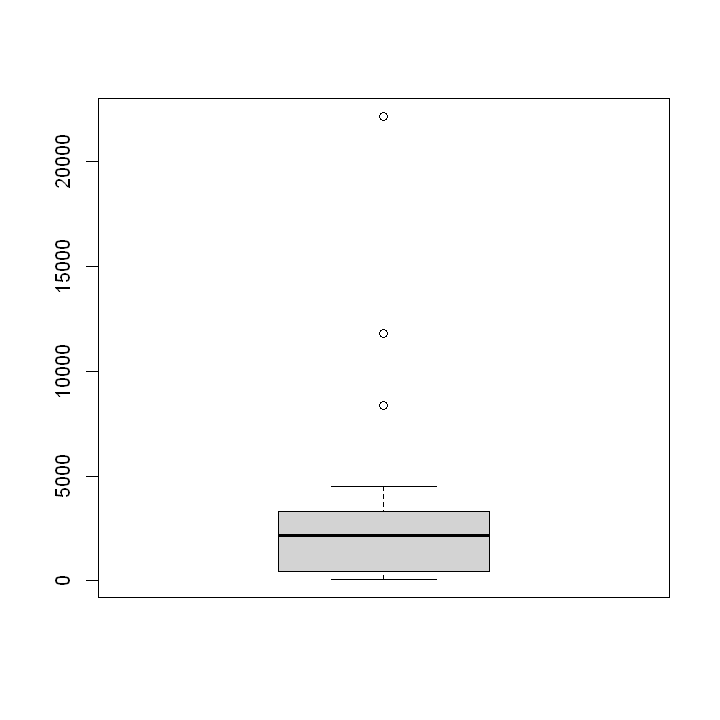

In [191]:
demo <- foreign::read.spss("data/import_data/international.sav", to.data.frame = TRUE)
boxplot(demo$gdp)